## Automatic Ticket Assignment
One of the key activities of any IT function is to ensure there is no
impact to the Business operations. <b>IT leverages Incident Management process to achieve the
above Objective.</b> An incident is something that is unplanned interruption to an IT service or
reduction in the quality of an IT service that affects the Users and the Business. <b><i>The main goal
of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact.</i></b>

In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring
systems and tools. <b>Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources.</b>

<i> Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.</i>
#### <b>Business Domain Value:</b> 
In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings.

Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56%
of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure.

L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams. During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service.

## Objective:
### Build Multi-Class classifier that can classify the tickets by analysing text.###
Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.
### Milestones
1. Milestone 1: Pre-Processing, Data Visualisation and EDA
  1. Exploring the given Data files
  2. Understanding the structure of data
  3. Missing points in data
  4. Finding inconsistencies in the data
  5. Visualizing different patterns
  6. Visualizing different text features
  7. Dealing with missing values
  8. Text preprocessing
  9. Creating word vocabulary from the corpus of report text data
  10. Creating tokens as required

2. Milestone 2: Model Building
  1. Building a model architecture which can classify.
  2. Trying different model architectures by researching state of the art for similar tasks.
  3. Train the model
  4. To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.

3. Milestone 3: Test the Model, Fine-tuning and Repeat
  1. Test the model and report as per evaluation metrics
  2. Try different models
  3. Try different evaluation metrics
  4. Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them
  5. Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.
---

### <u>Imports and Configurations</u>
Section to import all necessary packages. Install the libraries which are not included in Anaconda distribution by default using pypi channel or conda forge
**``!pip install ftfy wordcloud goslate spacy plotly cufflinks``**<br/>
**``conda install -c conda-forge ftfy wordcloud goslate spacy plotly cufflinks``**

In [1]:
# Utilities
from time import time
from PIL import Image
from zipfile import ZipFile
import os, sys, itertools, re
import warnings, pickle, string
from ftfy import fix_encoding, fix_text, badness
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Translation APIs
from goslate import Goslate # Provided by Google

# Numerical calculation
import numpy as np

# Data Handling
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

# Sequential Modeling
import keras.backend as K
from keras.datasets import imdb
from keras.models import Sequential, Model
from keras.layers.merge import Concatenate
from keras.layers import Input, Dropout, Flatten, Dense, Embedding, LSTM, GRU
from keras.layers import BatchNormalization, TimeDistributed, Conv1D, MaxPooling1D
from keras.constraints import max_norm, unit_norm
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Traditional Modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Tools & Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# NLP toolkits
import spacy
import nltk
from nltk import tokenize

Using TensorFlow backend.


In [2]:
# Configure for any default setting of any library
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

### <u>Set the working directory</u>
Mount the drive and set the project path to cureent working directory, when running in Google Colab. No changes are required in case of running in Local PC.

In [3]:
# Block which runs on both Google Colab and Local PC without any modification
if 'google.colab' in sys.modules:    
    project_path = "/content/drive/My Drive/Colab Notebooks/DLCP/Capstone-NLP/"
    # Google Colab lib
    from google.colab import drive
    # Mount the drive
    drive.mount('/content/drive/', force_remount=True)
    sys.path.append(project_path)
    %cd $project_path

# Let's look at the sys path
print('Current working directory', os.getcwd())

Current working directory D:\Hands-On\PGP-AIML\CaseStudies\Capstone Projects\1-NLP-Automatic.Ticket.Assignment


---
### <u>Load the dataset</u>

In [4]:
# Load the dataset into a Pandas dataframe called ticket and check the head of the dataset
ticket = pd.read_excel('Input Data Synthetic (created but not used in our project).xlsx', )
ticket.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

In [5]:
# Check the tail of the dataset
ticket.tail()

Short description  \
8495                  emails not coming in from zz mail   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498                     machine nÃ£o estÃ¡ funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
8495  \r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...  avglmrts vhqmtiua   
8496                           telephony_software issue  rbozivdq gmlhrtvp   
8497  vip2: windows password reset for tifpdchb pedx...  oybwdsgx oxyhwrfz   
8498  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8499  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group  
8495           GRP_29  
8496            GRP_0  
8497            GRP_0  
8498           GRP_62  
8499           GRP_49

**Comments**
* To take a closer look at the data, pandas library provides **“.head()”** function which returns first five observations and **“.tail()”** function which returns last five observations of the data set.

### <u>Inspect the Dataset</u>
The dataset is divided into two parts, namely, **feature matrix** and the **response vector**.

- Feature matrix contains all the vectors(rows) of dataset in which each vector consists of the value of **dependent features**. In above dataset, features are *Short description*, *Description* and *Caller*.
- Response vector contains the value of **class variable**(prediction or output) for each row of feature matrix. In above dataset, the class variable name is *Assignment group*.

In [6]:
# Get the shape and size of the dataset
print('No of rows:\033[1m', ticket.shape[0], '\033[0m')
print('No of cols:\033[1m', ticket.shape[1], '\033[0m')

No of rows: 8500 
No of cols: 4 


In [7]:
# Get more info on it
# 1. Name of the columns
# 2. Find the data types of each columns
# 3. Look for any null/missing values
ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
Short description    8492 non-null object
Description          8499 non-null object
Caller               8500 non-null object
Assignment group     8500 non-null object
dtypes: object(4)
memory usage: 265.8+ KB


In [8]:
# Describe the dataset with various summary and statistics
ticket.describe()

Short description Description             Caller Assignment group
count               8492        8499               8500             8500
unique              7481        7817               2950               74
top       password reset         the  bpctwhsn kzqsbmtp            GRP_0
freq                  38          56                810             3976

In [9]:
# Check the Short description of tickets having Description as only 'the'
ticket[ticket.Description == 'the'].head()

Short description Description  \
1049  reset passwords for soldfnbq uhnbsvqd using pa...         the   
1054  reset passwords for fygrwuna gomcekzi using pa...         the   
1144  reset passwords for wvdxnkhf jirecvta using pa...         the   
1184  reset passwords for pxvjczdt kizsjfpq using pa...         the   
1292  reset passwords for cubdsrml znewqgop using pa...         the   

                 Caller Assignment group  
1049  soldfnbq uhnbsvqd           GRP_17  
1054  fygrwuna gomcekzi           GRP_17  
1144  wvdxnkhf jirecvta           GRP_17  
1184  pxvjczdt kizsjfpq           GRP_17  
1292  cubdsrml znewqgop           GRP_17

In [10]:
# Find out the null value counts in each column
ticket.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

**Observations**
- The dataset comprises of **8500 rows** and **4 columns**
- All columns are of type object containing textual information.
- There are **8 null/missing values** present in the Short description and **1 null/missing values** present in the description column
- **Password reset** is one of the most occuring tickets which reflects in the Short description column.
- The top occuring Description in the dataset is only the text **'the'**, which absolutely doesn't make any sense. hence by looking at the Short description of such rows reveals that these are also a category of Password reset.

### <u>NULL treatment</u>

In [11]:
# Let's look at the rows with null values
ticket[pd.isnull(ticket).any(axis=1)]

Short description  \
2604                       NaN   
3383                       NaN   
3906                       NaN   
3910                       NaN   
3915                       NaN   
3921                       NaN   
3924                       NaN   
4341                       NaN   
4395  i am locked out of skype   

                                            Description             Caller  \
2604  \r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...  ohdrnswl rezuibdt   
3383  \r\n-connected to the user system using teamvi...  qftpazns fxpnytmk   
3906  -user unable  tologin to vpn.\r\n-connected to...  awpcmsey ctdiuqwe   
3910  -user unable  tologin to vpn.\r\n-connected to...  rhwsmefo tvphyura   
3915  -user unable  tologin to vpn.\r\n-connected to...  hxripljo efzounig   
3921  -user unable  tologin to vpn.\r\n-connected to...  cziadygo veiosxby   
3924  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...  wvqgbdhm fwchqjor   
4341  \r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...  eqmuniov ehxkcbgj   
4395                                                NaN  viyglzfo ajtfzpkb   

     Assignment group  
2604           GRP_34  
3383            GRP_0  
3906            GRP_0  
3910            GRP_0  
3915            GRP_0  
3921            GRP_0  
3924            GRP_0  
4341            GRP_0  
4395            GRP_0

In [12]:
# NULL replacement
ticket.fillna(str(), inplace=True)
ticket[pd.isnull(ticket).any(axis=1)]

Empty DataFrame
Columns: [Short description, Description, Caller, Assignment group]
Index: []

In [13]:
# verify the replacement
ticket.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

**Comments**:
- We have various ways of treating the NULL/Missing values in the dataset such as 
    - Replacing them with empty string 
    - Replacing them with some default values
    - Duplicating the Short description and Description values wherever one of them is Null
    - Dropping the records with null/missing values completely.
- We're not choosing to drop any record as we don't want to loose any information. And as we're going to concatenate the Short description and Description columns for each record while feeding them into NLP, we neither want to pollute the data by introducing any default values nor bias it by duplicating the description colomns.
- Hence our NULL/Missing value treatment replaces the NaN cells with just empty string.

### <u>Mojibake </u>
[Mojibake](https://en.wikipedia.org/wiki/Mojibake) is the garbled text that is the result of text being decoded using an unintended character encoding. The result is a systematic replacement of symbols with completely unrelated ones, often from a different writing system.<br/>
This display may include the generic replacement character ("�") in places where the binary representation is considered invalid. A replacement can also involve multiple consecutive symbols, as viewed in one encoding, when the same binary code constitutes one symbol in the other encoding. This is either because of differing constant length encoding (as in Asian 16-bit encodings vs European 8-bit encodings), or the use of variable length encodings (notably UTF-8 and UTF-16). Few such Mojibakes are **¶**, **ç**, **å**, **€**, **æ**, **œ**, **º**, **‡**, **¼**, **¥** etc.

As we're dealing with Natural Language and the source of the data is unknown to us, let's run the encoding check to figure out if the dataset is Mojibake impacted.

The library **ftfy** (Fixes Text For You) has a greater ability to detect, fix and deal with such Mojibakes. It fixes Unicode that’s broken in various ways. The goal of ftfy is to take in bad Unicode and output good Unicode.

Installation:<br/>
using pypi: **`!pip install ftfy`**<br/>
using conda: **`conda install -c conda-forge ftfy`**

In [14]:
# Write a function to apply to the dataset to detect Mojibakes
def is_mojibake_impacted(text):
    if not badness.sequence_weirdness(text):
        # nothing weird, should be okay
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        # Not CP-1252 encodable, probably fine
        return True
    else:
        # Encodable as CP-1252, Mojibake alert level high
        return False
    
# Check the dataset for mojibake impact
ticket[~ticket.iloc[:,:-1].applymap(is_mojibake_impacted).all(1)]

Short description  \
99                             password expiry tomorrow   
116                                       server issues   
124                            mobile device activation   
164          æ’¤å›ž: ticket_no1564867 -- comments added   
170        [urgent!!] delivery note creation request!!    
...                                                 ...   
8470  please review your recent ticketing_tool ticke...   
8471                           ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥   
8480                      customer group enhanced field   
8498                     machine nÃ£o estÃ¡ funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
99    \n\nreceived from: ecprjbod.litmjwsy@gmail.com...  ecprjbod litmjwsy   
116   \r\n\r\nreceived from: bgqpotek.cuxakvml@gmail...  bgqpotek cuxakvml   
124   from: tvcdfqgp nrbcqwgj \nsent: friday, octobe...  tvcdfqgp nrbcqwgj   
164   \n\nreceived from: abcdri@company.com\n\nwindy...  tycludks cjofwigv   
170   \n\nreceived from: fbvpcytz.nokypgvx@gmail.com...  fbvpcytz nokypgvx   
...                                                 ...                ...   
8470  from: mikhghytr wafglhdrhjop \nsent: thursday,...  azxhejvq fyemlavd   
8471         to å°è´ºï¼Œæ—©ä¸Šç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥  xqyjztnm onfusvlz   
8480  \r\n\r\nreceived from: nlearzwi.ukdzstwi@gmail...  nlearzwi ukdzstwi   
8498  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8499  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group  
99              GRP_0  
116             GRP_0  
124             GRP_0  
164             GRP_0  
170            GRP_18  
...               ...  
8470           GRP_16  
8471           GRP_30  
8480            GRP_9  
8498           GRP_62  
8499           GRP_49  

[828 rows x 4 columns]

In [15]:
# Take an example of row# 8471 Short Desc and fix it
print('Grabled text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % (ticket['Short description'][8471], 
                                                                        fix_text(ticket['Short description'][8471])))

# List all mojibakes defined in ftfy library
print('\nMojibake Symbol RegEx:\n', badness.MOJIBAKE_SYMBOL_RE.pattern)

Grabled text: ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥
Fixed text: 电脑开机开不出来

Mojibake Symbol RegEx:
 [ÂÃĂ][-€ƒ‚„†‡ˆ‰‹Œ“•˜œŸ¡¢£¤¥¦§¨ª«¬¯°±²³µ¶·¸¹º¼½¾¿ˇ˘˝]|[ÂÃĂ][›»‘”©™]\w|[¬√][ÄÅÇÉÑÖÜáàâäãåçéèêëíìîïñúùûü†¢£§¶ß®©™≠ÆØ¥ªæø≤≥]|\w√[±∂]\w|[ðđ][Ÿ]|â€|вЂ[љћ¦°№™ќ“”]


In [16]:
# Sanitize the dataset from Mojibakes
ticket['Short description'] = ticket['Short description'].apply(fix_text)
ticket['Description'] = ticket['Description'].apply(fix_text)

# Visualize that row# 8471
ticket.iloc[8471,:]

Short description             电脑开机开不出来
Description           to 小贺,早上电脑开机开不出来
Caller               xqyjztnm onfusvlz
Assignment group                GRP_30
Name: 8471, dtype: object

In [17]:
# Serialize the mojibake treated dataset
ticket.to_csv('mojibake_treated.csv', index=False, encoding='utf_8_sig')
with open('mojibake_treated.pkl', 'wb') as handle:
    pickle.dump(ticket, handle, protocol=pickle.HIGHEST_PROTOCOL)

**Comments:**
- `badness.sequence_weirdness()` determines how often a text has unexpected characters or sequences of characters. This metric is used to disambiguate when text should be re-decoded or left as is.
- We're successfuly able to get the grabled characters back into their original form using **ftfy.fix_text()``**, however it is observed that the row# 8471 is not English but Mandarine.
- So the data in our hand is multilingual and it is quite not possible to derive embeddings for mix of multiple languages. We're going to translate the entire dataset into a single language of English.

### <u>Language Translation (Goslate: Free Google Translate API)</u>
Goslate is an open source python library that implemented Google Translate API. This uses the [Google Translate Ajax API](https://translate.google.com/) to make calls to such methods as detect and translate. It is choosen over another library Googletrans from Google as Goslate is developed to bypass the ticketing mechanism to prevent simple crawler program to access the Ajax API. Hence Goslate with multiple service urls is able to translate the entire dataset in very few iterations without blocking the user's IP address.

Installation:<br/>
using pypi: **`!pip install goslate`**<br/>
using conda: **`conda install -c conda-forge goslate`**

Servicce Urls used:
**``translate.google.com``**, **``translate.google.com.au``**, **``translate.google.com.ar``**, **``translate.google.co.kr``**, **``translate.google.co.in``**, **``translate.google.co.jp``**, **``translate.google.at``**, **``translate.google.de``**, **``translate.google.ru``**, **``translate.google.ch``**, **``translate.google.fr``**, **``translate.google.es``**, **``translate.google.ae``**

In [18]:
# Define and construct the service urls
svc_domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
svc_urls = ['http://translate.google' + domain for domain in svc_domains]

# # Take an example of row# 8471 Short Desc and fix it
# gs = Goslate(service_urls=svc_urls)
# trans_8471 = gs.translate(ticket['Short description'][8471], target_language='en', source_language='auto')
# print('Original text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % (ticket['Short description'][8471], trans_8471))
print('Original text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % ('电脑开机开不出来', 'Boot the computer does not really come out'))

Original text: 电脑开机开不出来
Fixed text: Boot the computer does not really come out


In [19]:
# List of column data to consider for translation
trans_cols = ['Short description','Description']

# Add a new column to store the detected language
ticket.insert(loc=2, column='Language', value=np.nan, allow_duplicates=True)

for idx in range(ticket.shape[0]):
    # Instantiate Goslate class in each iteration
    gs = Goslate(service_urls=svc_urls)
    lang = gs.detect(' '.join(ticket.loc[idx, trans_cols].tolist()))
    row_iter = gs.translate(ticket.loc[idx, trans_cols].tolist(), 
                            target_language='en', 
                            source_language='auto')
    ticket.loc[idx, trans_cols] = list(row_iter)
    
ticket.Language = lang
ticket.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                    Error skype   

                                         Description Language  \
0  -verified user details.(employee# & manager na...  English   
1  received from: hmjdrvpb.komuaywn@gmail.com\n\n...  English   
2  received from: eylqgodm.ybqkwiam@gmail.com\n\n...  English   
3                      unable to access hr_tool page  English   
4                                        Error skype  English   

              Caller Assignment group  
0  spxjnwir pjlcoqds            GRP_0  
1  hmjdrvpb komuaywn            GRP_0  
2  eylqgodm ybqkwiam            GRP_0  
3  xbkucsvz gcpydteq            GRP_0  
4  owlgqjme qhcozdfx            GRP_0

In [20]:
# Serialize the translated dataset
ticket.to_csv('translated_ticket.csv', index=False, encoding='utf_8_sig')
with open('translated_ticket.pkl','wb') as f:
    pickle.dump(ticket, f, pickle.HIGHEST_PROTOCOL)

In [21]:
# Load the translated pickle file incase the IP gets blocked
with open('translated_ticket.pkl','rb') as f:
    ticket = pickle.load(f)

**Comments**:
- Unless paid service is used, Google blocks repetative hits to its Ajax API either via Googletrans or Goslate after certain iterations by cloagging the IP address.
- Using these list of various domains of translation API as service urls helped the traffic being patched among themselves, in turn allowing a longer buffer before the IP gets blocked.

### <u>Text Preprocessing</u>
Text preprocessing is the process of transferring text from human language to machine-readable format for further processing. After a text is obtained, we start with text normalization. Text normalization includes:
- converting all letters to lower or upper case
- converting numbers into words or removing numbers
- removing punctuations, accent marks and other diacritics
- removing white spaces
- removing stop words, sparse terms, and particular words
- text canonicalization

In [22]:
# Define regex patterns
EMAIL_PATTERN = r"([\w.+-]+@[a-z\d-]+\.[a-z\d.-]+)"
PUNCT_PATTERN = r"[,|@|\|?|\\|$&*|%|\r|\n|.:|\s+|/|//|\\|/|\||-|<|>|;|(|)|=|+|#|-|\"|[-\]]|{|}]"
# Negative Lookbehind for EmailId replacement- Don't match any number which follows the text "RetainedEmailId"
NUMER_PATTERN = r"(?<!RetainedEmailId)(\d+(?:\.\d+)?)"

# Define a function to treat the texts
def cleanseText(text):
    # Make the text unicase (lower) 
    text = str(text).lower()
    # Remove email adresses
    # text = re.sub(EMAIL_PATTERN, '', text, flags=re.IGNORECASE)
    # Save Email addresses and replace them with custom keyword
    email_dict = extract_email(text)
    for key in email_dict.keys():
        text = text.replace(email_dict[key], key)
    # Remove all numbers 
    text = re.sub(NUMER_PATTERN, '', text)
    # Replace all punctuations with blank space
    # text = re.sub(PUNCT_PATTERN, " ", text, flags=re.MULTILINE)
    text = text.translate(str.maketrans("","", string.punctuation))
    text = re.sub(r'\s+', ' ', text)
    # Replace multiple spaces from prev step to single
    text = re.sub(r' {2,}', " ", text, flags=re.MULTILINE)
    text = text.replace('`',"'")
    # Replace the email ids back into their original position
    for key in email_dict.keys():
        text = text.replace(key, email_dict[key])
    return text.strip()

def extract_email(text):
    # Replaces the email addresses with custom key word and 
    # save them into a dictionary for future use
    unique_emailid = set(re.findall(EMAIL_PATTERN, text))
    email_replacement = dict()
    for idx, email in enumerate(unique_emailid):
        email_replacement[f'RetainedEmailId{idx}'] = email
    return email_replacement

In [23]:
# Take an example of row# 32 Description and fix it
print('\033[1mOriginal text:\033[0m')
print(ticket['Description'][32])
print('_'*100)
print('\033[1mCleaned text:\033[0m')
print(cleanseText(ticket['Description'][32]))

Original text:
received from: kxsceyzo.naokumlb@gmail.com

gentles,

i have two devices that are trying to share an ip address. they are trying to share 96.26.27.9619. one is a printer with the hostname of prtjc0074, and the other is a new display for erp. the display is using dhcp to get its address assigned and the printer is hard coded.

my guess is that the address 96.26.27.9619 did not get set to a static address in dhcp. i need this corrected so the display will pick up another address.
____________________________________________________________________________________________________
Cleaned text:
received from kxsceyzo.naokumlb@gmail.com gentles i have two devices that are trying to share an ip address they are trying to share one is a printer with the hostname of prtjc and the other is a new display for erp the display is using dhcp to get its address assigned and the printer is hard coded my guess is that the address did not get set to a static address in dhcp i need this co

In [24]:
# Apply the cleaning function to entire dataset
ticket['Description'] = ticket['Description'].apply(cleanseText)
ticket['Short description'] = ticket['Short description'].apply(cleanseText)

# Verify the data
ticket.tail()

Short description  \
8495                  emails not coming in from zz mail   
8496                            telephonysoftware issue   
8497   vip windows password reset for tifpdchb pedxruyf   
8498                             machine is not working   
8499  various prgramdntyme can not be opened on mult...   

                                            Description    Language  \
8495  received from avglmrts.vhqmtiua@gmail.com good...     English   
8496                            telephonysoftware issue     English   
8497   vip windows password reset for tifpdchb pedxruyf     English   
8498  i am unable to access the machine utilities to...  Portuguese   
8499  various prgramdntyme can not be opened on mult...      German   

                 Caller Assignment group  
8495  avglmrts vhqmtiua           GRP_29  
8496  rbozivdq gmlhrtvp            GRP_0  
8497  oybwdsgx oxyhwrfz            GRP_0  
8498  ufawcgob aowhxjky           GRP_62  
8499  kqvbrspl jyzoklfx           GRP_49

**Comments:**
- Entire dataset is converted into lower case
- Users email addresses will add NO value to our analysis, despite the fact that user id is given in the caller column. So all email adresses are removed from the dataset
- All numerals are removed because they were dominating the dataset if we were converting them into their word representation otherwise.
- All punctuation marks are removed which used to be a hindrance in lemmatization.
- All occurances of more than one blank spaces, horizontal tab spaces, new line breaks etc. have been replaced with single blank space.

Now with a nice and cleaner data in our hand let's proceed towards Lemmatization.
### <u>Stemming and Lemmatization</u>
Stemming and Lemmatization are Text Normalization (or sometimes called Word Normalization) techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing.<br/>
In grammar, inflection is known as the modification of a word to express different grammatical categories such as tense, case, voice, aspect, person, number, gender, and mood. An inflection expresses one or more grammatical categories with a prefix, suffix or infix, or another internal modification such as a vowel change.

**Stemming**<br/>
Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.

**Lemmatization**<br/>
Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

### spaCy
The [spaCy](https://spacy.io/) library is one of the most popular NLP libraries along with NLTK which contains only one, but the best algorithm to solve any Natural Language problem. Once it is downloaded and installed, the next step is to download the language model, which is used to perform a variety of NLP tasks.

Installation:<br/>
using pypi: **`!pip install spacy`**<br/>
using conda: **`conda install -c conda-forge spacy`**

Language Model Download:<br/>
**``$ python -m spacy download en_core_web_md``**

In [25]:
# Initialize spacy 'en' medium model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

# Define a function to lemmatize the descriptions
def lemmatizer(sentence):
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])

In [26]:
# Take an example of row# 43 Description and lemmatize it
print('\033[1mOriginal text:\033[0m')
print(ticket['Description'][43])
print('_'*100)
print('\033[1mLemmatized text:\033[0m')
print(lemmatizer(ticket['Description'][43]))

Original text:
received from yisohglr.uvteflgb@gmail.com hi the printer printer is not working and needs a part replaced can you reroute the jobs in queue to printer printer wihuyjdo qpogfwkb has indicated that prqos needs a new part and it may not deliver for a few days so the inwarehousetools will need to print on printer for now this needs to be taken care of today since the inwarehousetools are printed and are picked up by an outside vendor at pm in usa on a daily basis please contact dkmcfreg anwmfvlgenkataramdntyana if you have questions about the jobs in queue for today
____________________________________________________________________________________________________
Lemmatized text:
receive from yisohglr.uvteflgb@gmail.com hi the printer printer be not work and need a part replace can reroute the job in queue to printer printer wihuyjdo qpogfwkb have indicate that prqos need a new part and may not deliver for a few day so the inwarehousetool will need to print on printer for 

In [27]:
# Apply the Lemmatization to entire dataset
ticket['Description'] = ticket['Description'].apply(lemmatizer)
ticket['Short description'] = ticket['Short description'].apply(lemmatizer)

# Verify the data
ticket.tail()

Short description  \
8495                     email not come in from zz mail   
8496                            telephonysoftware issue   
8497   vip windows password reset for tifpdchb pedxruyf   
8498                                machine be not work   
8499  various prgramdntyme can not be open on multip...   

                                            Description    Language  \
8495  receive from avglmrts.vhqmtiua@gmail.com good ...     English   
8496                            telephonysoftware issue     English   
8497   vip windows password reset for tifpdchb pedxruyf     English   
8498  i be unable to access the machine utility to f...  Portuguese   
8499  various prgramdntyme can not be open on multip...      German   

                 Caller Assignment group  
8495  avglmrts vhqmtiua           GRP_29  
8496  rbozivdq gmlhrtvp            GRP_0  
8497  oybwdsgx oxyhwrfz            GRP_0  
8498  ufawcgob aowhxjky           GRP_62  
8499  kqvbrspl jyzoklfx           GRP_49

In [28]:
# Serialize the preprocessed dataset
ticket.to_csv('preprocessed_ticket.csv', index=False, encoding='utf_8_sig')
with open('preprocessed_ticket.pkl','wb') as f:
    pickle.dump(ticket, f, pickle.HIGHEST_PROTOCOL)

In [29]:
# Create new features of length and word count for both of the description columns
ticket.insert(1, 'sd_len', ticket['Short description'].astype(str).apply(len))
ticket.insert(2, 'sd_word_count', ticket['Short description'].apply(lambda x: len(str(x).split())))
ticket.insert(4, 'desc_len', ticket['Description'].astype(str).apply(len))
ticket.insert(5, 'desc_word_count', ticket['Description'].apply(lambda x: len(str(x).split())))
ticket.head()

Short description  sd_len  sd_word_count  \
0                   login issue      11              2   
1                       outlook       7              1   
2         can not log in to vpn      21              6   
3  unable to access hrtool page      28              5   
4                   error skype      11              2   

                                         Description  desc_len  \
0  verified user detailsemployee manager name che...       177   
1  receive from hmjdrvpb.komuaywn@gmail.com hello...       163   
2  receive from eylqgodm.ybqkwiam@gmail.com hi i ...        72   
3                       unable to access hrtool page        28   
4                                        error skype        11   

   desc_word_count Language             Caller Assignment group  
0               31  English  spxjnwir pjlcoqds            GRP_0  
1               23  English  hmjdrvpb komuaywn            GRP_0  
2               12  English  eylqgodm ybqkwiam            GRP_0  
3                5  English  xbkucsvz gcpydteq            GRP_0  
4                2  English  owlgqjme qhcozdfx            GRP_0

### <u>Exploratory Data Analysis</u>
Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) to
- maximize insight into a data set;
- uncover underlying structure;
- extract important variables;
- detect outliers and anomalies;
- test underlying assumptions;
- develop parsimonious models; and
- determine optimal factor settings

Visually representing the content of a text document is one of the most important tasks in the field of text mining. It helps not only to explore the content of documents from different aspects and at different levels of details, but also helps in summarizing a single document, show the words and topics, detect events, and create storylines.

We'll be using plotly library to generate the graphs and visualizations. We need [cufflinks](https://plot.ly/python/v3/ipython-notebooks/cufflinks/) to link plotly to pandas dataframe and add the iplot method

Installation:<br/>
using pypi: **`!pip install plotly cufflinks`**<br/>
using conda: **`conda install -c conda-forge plotly cufflinks`**

In [30]:
# Check the version of Plotly and Cufflinks packages
print('Plotly:', py.__version__)
print('Cufflinks:', cf.__version__)

Plotly: 4.5.0
Cufflinks: 0.17.0


### Univariate visualization
Single-variable or univariate visualization is the simplest type of visualization which consists of observations on only a single characteristic or attribute. Univariate visualization includes histogram, bar plots and line charts.

#### The distribution of Assignment groups
Plots how the assignments groups are scattered across the dataset. The bar chart, histogram and pie chart tells the frequency of any ticket assigned to any group OR the tickets count for each group.

In [31]:
# Assignment group distribution
print('\033[1mTotal assignment groups:\033[0m', ticket['Assignment group'].nunique())

# Histogram
ticket['Assignment group'].iplot(
    kind='hist',
    xTitle='Assignment Group',
    yTitle='count',
    title='Assignment Group Distribution- Histogram (Fig-1)')

# Pie chart
assgn_grp = pd.DataFrame(ticket.groupby('Assignment group').size(),columns = ['Count']).reset_index()
assgn_grp.iplot(
    kind='pie', 
    labels='Assignment group', 
    values='Count', 
    title='Assignment Group Distribution- Pie Chart (Fig-2)', 
    hoverinfo="label+percent+name", hole=0.25)

# Bar plot
ticket['Assignment group'].iplot(
    kind='bar',
    yTitle='Assignment Group',
    xTitle='Record #',
    colorscale='-plotly',
    title='Assignment Group Distribution- Bar Chart (Fig-3)')

Total assignment groups: 74


#### Central Limit Theorem
The Central Limit Theorem states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true and practitioners have been presumably considered it for sample sizes over 30. All this is saying is that as you take more samples, especially large ones, your graph of the sample means will look more like a normal distribution.

Hence let's identify such Assignment groups which doesn't have atleast 30 tickets assigned to them and categorize them as rare group.

In [32]:
# Find out the Assignment Groups with less than equal to 30 tickets assigned
rare_ticket = ticket.groupby(['Assignment group']).filter(lambda x: len(x) <= 30)
print('\033[1m#Groups with less than equal to 30 tickets assigned:\033[0m', rare_ticket['Assignment group'].nunique())

rare_ticket['Assignment group'].iplot(
    kind='hist',
    xTitle='Assignment Group',
    yTitle='count',
    colorscale='-orrd',
    title='#Records by rare Assignment Groups- Histogram (Fig-4)')

#Groups with less than equal to 30 tickets assigned: 40


In [33]:
# Distribution of Assignment groups excluding GRP_0 & rare groups (groups with less than equal 30 tickets assigned)
excluded_grp = ['GRP_0']
excluded_grp.extend(rare_ticket['Assignment group'].unique())
filtered_tkt = ticket[~ticket['Assignment group'].isin(excluded_grp)]

# Pie chart
filtered_assgn_grp = pd.DataFrame(filtered_tkt.groupby('Assignment group').size(),columns = ['Count']).reset_index()
filtered_assgn_grp.iplot(
    kind='pie', 
    labels='Assignment group', 
    values='Count', 
    title='#Records by Assignment groups(excluding GRP_0 and rare groups)- Pie Chart (Fig-5)',
    pull=np.linspace(0,0.3,filtered_assgn_grp['Assignment group'].nunique()))

# Histogram
filtered_tkt['Assignment group'].iplot(
    kind='histogram',
    xTitle='Assignment Group',
    yTitle='count',
    colorscale='-gnbu',
    title='#Records by Assignment groups(excluding GRP_0 and rare groups)- Histogram (Fig-6)')

**Comments:**
- The bottom section of bar chart (Fig-3) is dense enough to indicate the GRP_0 is the most assigned group. So is also proved from the Histogram (Fig-1) and the pie chart (Fig-2) that tickets assigned to GRP_0 is close to 4000 out of 8500 records, which is $46.8\%$ in volume.
- The $2^{nd}$ highest assignment group is GRP_8, which is just $7.78\%$ of the total dataset and $\frac{1}{6}^{th}$ of the GRP_0
- There are 40 groups with just 30 or less tickets assigned (Fig-4), amongst which 6 groups happened to be assigned with just 1 ticket and 4 groups with just 2 tickets each.
- As assignment group attribue is the target column in our dataset, these tickets distribution shows the dataset is miserably imbalanced.

#### The distribution of Callers
Plots how the callers are associated with tickets and what are the assignment groups they most frequently raise tickets for.

In [34]:
# Find out top 10 callers in terms of frequency of raising tickets in the entire dataset
print('\033[1mTotal caller count:\033[0m', ticket['Caller'].nunique())
df = pd.DataFrame(ticket.groupby(['Caller']).size().nlargest(10), columns=['Count']).reset_index()
df.iplot(kind='pie',
         labels='Caller', 
         values='Count', 
         title='Top 10 caller- Pie Chart (Fig-7)',
         colorscale='-spectral',
         pull=[0,0,0,0,0.05,0.1,0.15,0.2,0.25,0.3])

Total caller count: 2950


In [35]:
# Top 5 callers in each assignment group
top_n = 5
s = ticket['Caller'].groupby(ticket['Assignment group']).value_counts()
caller_grp = pd.DataFrame(s.groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True))
caller_grp.head(15)

Caller
Assignment group Caller                   
GRP_0            fumkcsji sarmtlhy     132
                 rbozivdq gmlhrtvp      86
                 olckhmvx pcqobjnd      54
                 efbwiadp dicafxhv      45
                 mfeyouli ndobtzpw      13
GRP_1            bpctwhsn kzqsbmtp       6
                 jloygrwh acvztedi       4
                 jyoqwxhz clhxsoqy       3
                 spxqmiry zpwgoqju       3
                 kbnfxpsy gehxzayq       2
GRP_10           bpctwhsn kzqsbmtp      60
                 ihfkwzjd erbxoyqk       6
                 dizquolf hlykecxa       5
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3

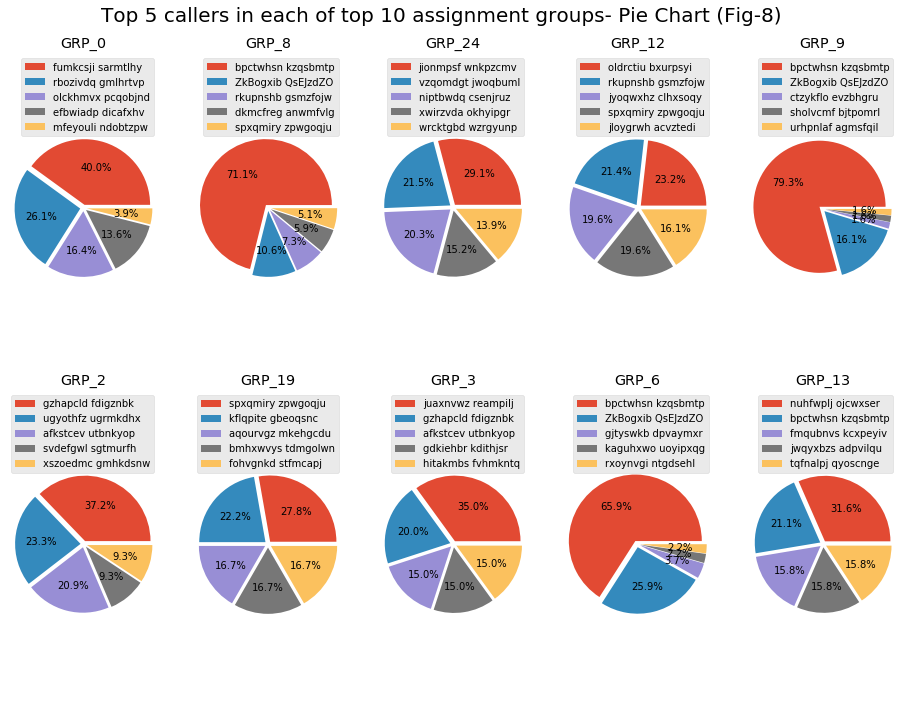

In [36]:
# Visualize Top 5 callers in each of top 10 assignment groups
top_n = 10
top_grps = assgn_grp.nlargest(top_n, 'Count')['Assignment group'].tolist()

fig_cols = 5
fig_rows = int(np.ceil(top_n/fig_cols))
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(13,9.5))
fig.suptitle('Top 5 callers in each of top 10 assignment groups- Pie Chart (Fig-8)', y=1, va= 'bottom', size='20')
for row in range(fig_rows):
    for col in range(fig_cols):
        grp_n = fig_cols * row + col
        if grp_n < top_n:
            xs = caller_grp.xs(top_grps[grp_n])
            _ = axes[row,col].pie(xs, autopct='%1.1f%%', explode=[0.05]*5)
            axes[row,col].legend(labels=xs.index,loc="best")
            axes[row,col].axis('equal')
            axes[row,col].set_title(top_grps[grp_n])

plt.tight_layout()

In [37]:
# Check if any caller appears to raise ticket for multiple groups
mul_caller = caller_grp[caller_grp.Caller.duplicated()]
uni_mul_caller = [idx[1] for idx in mul_caller.index[mul_caller.Caller.unique()]]
print(f'\033[1mFollowing {len(uni_mul_caller)} callers happen to raise tickets for multiple groups:\033[0m\n')
print(uni_mul_caller)

mul_caller

Following 15 callers happen to raise tickets for multiple groups:

['hlrmufzx qcdzierm', 'fbgetczn jlsvxura', 'gnasmtvx cwxtsvkm', 'ihfkwzjd erbxoyqk', 'tqfnalpj qyoscnge', 'fmqubnvs kcxpeyiv', 'tghrloks jbgcvlmf', 'jwqyxbzs adpvilqu', 'nuhfwplj ojcwxser', 'oldrctiu bxurpsyi', 'vlymsnej whlqxcst', 'dkmcfreg anwmfvlg', 'bpctwhsn kzqsbmtp', 'spxqmiry zpwgoqju', 'obanjrhg rnafleys']


Caller
Assignment group Caller                   
GRP_1            spxqmiry zpwgoqju       3
GRP_10           ihfkwzjd erbxoyqk       6
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3
GRP_11           tghrloks jbgcvlmf       2
...                                    ...
GRP_73           kcnosyae zlpmfxgs       1
GRP_8            ZkBogxib QsEJzdZO      54
GRP_9            ctzykflo evzbhgru       3
                 sholvcmf bjtpomrl       3
                 urhpnlaf agmsfqil       3

[281 rows x 1 columns]

**Comments:**
- There are 2950 callers have been captured in the entire dataset.
- 15 callers are identified to be involved in raising tickets for multiple assignment groups, there by contributing total 281 tickets in the dataset.
- The analysis of top 5 callers volume in each of the top 10 assignment groups shows a wide veriety of distributions in each pie chart. This is an indicative of the fact that each assignment group deals with issues impacting the business in NOT biased propertions.

#### The distribution of Short description lengths
Plots the variation of length and word count of Short description attribute

In [38]:
# Short Desc text length
ticket['sd_len'].iplot(
    kind='scatter',
    xTitle='text length',
    yTitle='count',
    title='Short Desc. Text Length Distribution (Fig-9)')

# Short desc word count
ticket['sd_word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    colorscale='pastel1',
    title='Short desc. Word Count Distribution (Fig-10)')

#### The distribution of Description lengths
Plots the variation of length and word count of Description attribute

In [39]:
# Description text length
ticket['desc_len'].iplot(
    kind='bar',
    xTitle='text length',
    yTitle='count',
    colorscale='-ylgn',
    title='Description Text Length Distribution (Fig-11)')

# Description word count
ticket['desc_word_count'].iplot(
    kind='bar',
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    colorscale='-bupu',
    title='Description Word Count Distribution (Fig-12)')

#### The distribution of Language
Plots the variation of tickets recieved in different languages

In [40]:
# Find out the volume of tickets received in different languages other than English
print('\033[1mTotal languages detected:\033[0m', ticket.Language.nunique())
df = pd.DataFrame(ticket.groupby(['Language']).size(), columns=['Count']).reset_index()

# Pie Chart
df[df.Language != 'English'].iplot(kind='pie',
         labels='Language', 
         values='Count', 
         title='Detected Language distribution- Pie Chart (Fig-13)',
         colorscale='plotly',
         pull=np.linspace(0,0.2,df.Language.nunique() - 1))

Total languages detected: 40


**Comments:**
- It is observed that there were quite number of people like to leave long descriptions.
- Tickets are detected to being raised in 40 various languages.

### N-Grams
N-gram is a contiguous sequence of N items from a given sample of text or speech, in the fields of computational linguistics and probability. The items can be phonemes, syllables, letters, words or base pairs according to the application. N-grams are used to describe the number of words used as observation points, e.g., unigram means singly-worded, bigram means 2-worded phrase, and trigram means 3-worded phrase. 

We'll be using scikit-learn’s CountVectorizer function to derive n-grams and compare them before and after removing stop words. Stop words are a set of commonly used words in any language. We'll be using english corpus stopwords and extend it to include some business specific common words considered to be stop words in our case.

But before that let's merge the Short descrition and Description column texts and write a generic method to derive the n-grams.

In [41]:
# Merge the Short descrition and Description column texts to create a new column
ticket.insert(loc=8, 
              column='Summary', 
              allow_duplicates=True, 
              value=list(ticket['Short description'].str.strip() + ' ' + ticket['Description'].str.strip()))
# Extend the English Stop Wordss
STOP_WORDS = STOPWORDS.union({'yes','na','hi',
                              'receive','hello',
                              'regards','thanks',
                              'from','greeting',
                              'forward','reply',
                              'will','please',
                              'see','help','able'})

# Generic function to derive top N n-grams from the corpus
def get_top_n_ngrams(corpus, top_n=None, ngram_range=(1,1), stopwords=None):
    vec = CountVectorizer(ngram_range=ngram_range, 
                          stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_n]

### Top Unigrams

In [42]:
# Top 50 Unigrams before removing stop words
top_n = 50
ngram_range = (1,1)
uni_grams = get_top_n_ngrams(ticket.Summary, top_n, ngram_range)

df = pd.DataFrame(uni_grams, columns = ['Summary' , 'count'])
df.groupby('Summary').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black', 
    colorscale='piyg',
    title=f'Top {top_n} Unigrams in Summary')

# Top 50 Unigrams after removing stop words
uni_grams_sw = get_top_n_ngrams(ticket.Summary, top_n, ngram_range, stopwords=STOP_WORDS)

df = pd.DataFrame(uni_grams_sw, columns = ['Summary' , 'count'])
df.groupby('Summary').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black',
    colorscale='-piyg',
    title=f'Top {top_n} Unigrams in Summary without stop words')

### Top Bigrams

In [43]:
# Top 50 Bigrams before removing stop words
top_n = 50
ngram_range = (2,2)
bi_grams = get_top_n_ngrams(ticket.Summary, top_n, ngram_range)

df = pd.DataFrame(bi_grams, columns = ['Summary' , 'count'])
df.groupby('Summary').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black', 
    colorscale='piyg',
    title=f'Top {top_n} Bigrams in Summary')

# Top 50 Bigrams after removing stop words
bi_grams_sw = get_top_n_ngrams(ticket.Summary, top_n, ngram_range, stopwords=STOP_WORDS)

df = pd.DataFrame(bi_grams_sw, columns = ['Summary' , 'count'])
df.groupby('Summary').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black',
    colorscale='-piyg',
    title=f'Top {top_n} Bigrams in Summary without stop words')

### Top Trigrams

In [44]:
# Top 50 Trigrams before removing stop words
top_n = 50
ngram_range = (3,3)
tri_grams = get_top_n_ngrams(ticket.Summary, top_n, ngram_range)

df = pd.DataFrame(tri_grams, columns = ['Summary' , 'count'])
df.groupby('Summary').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black', 
    colorscale='piyg',
    title=f'Top {top_n} Trigrams in Summary')

# Top 50 Trigrams after removing stop words
tri_grams_sw = get_top_n_ngrams(ticket.Summary, top_n, ngram_range, stopwords=STOP_WORDS)

df = pd.DataFrame(tri_grams_sw, columns = ['Summary' , 'count'])
df.groupby('Summary').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black',
    colorscale='-piyg',
    title=f'Top {top_n} Trigrams in Summary without stop words')

### Word Cloud
A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

Also known as tag clouds or text clouds, these are ideal ways to pull out the most pertinent parts of textual data, often also help business users compare and contrast two different pieces of text to find the wording similarities between the two.

Let's write a generic method to generate Word Clouds for both Short and Long Description columns.

In [45]:
def generate_word_clod(corpus):
    # mask = np.array(Image.open('cloud2.png'))
    # Instantiate the wordcloud object
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords=STOP_WORDS,
                    # mask=mask,
                    min_font_size = 10).generate(corpus)

    # plot the WordCloud image                        
    plt.figure(figsize = (12, 12), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

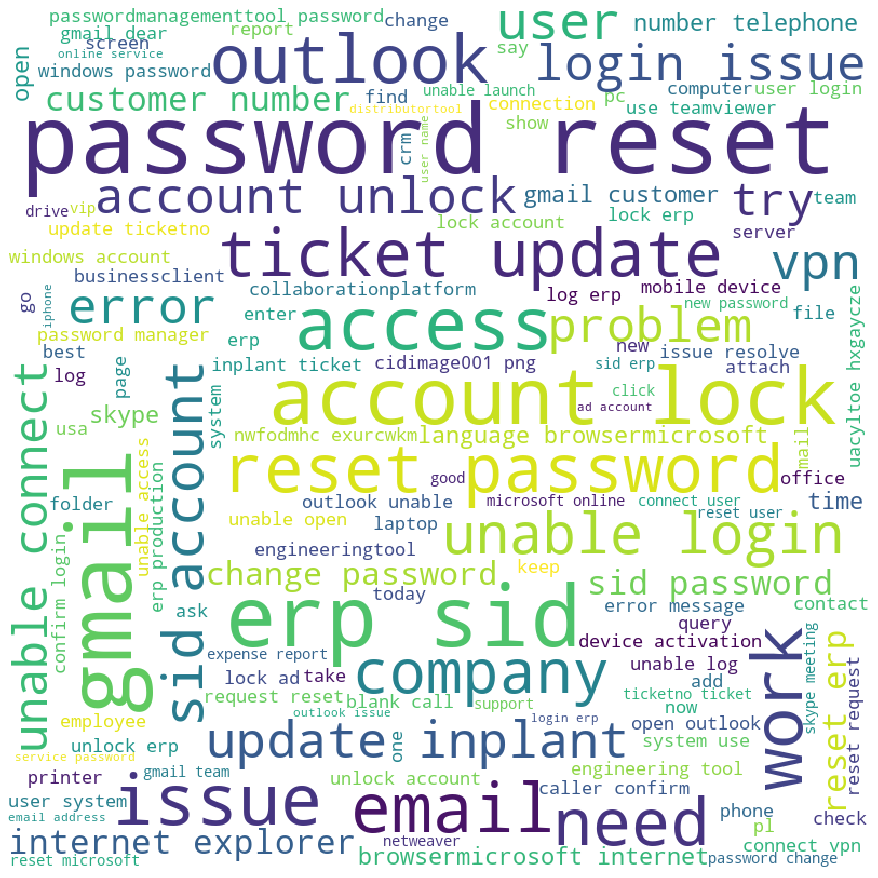

In [46]:
# Word Cloud for all tickets assigned to GRP_0
generate_word_clod(' '.join(ticket[ticket['Assignment group'] == 'GRP_0'].Summary.str.strip()))

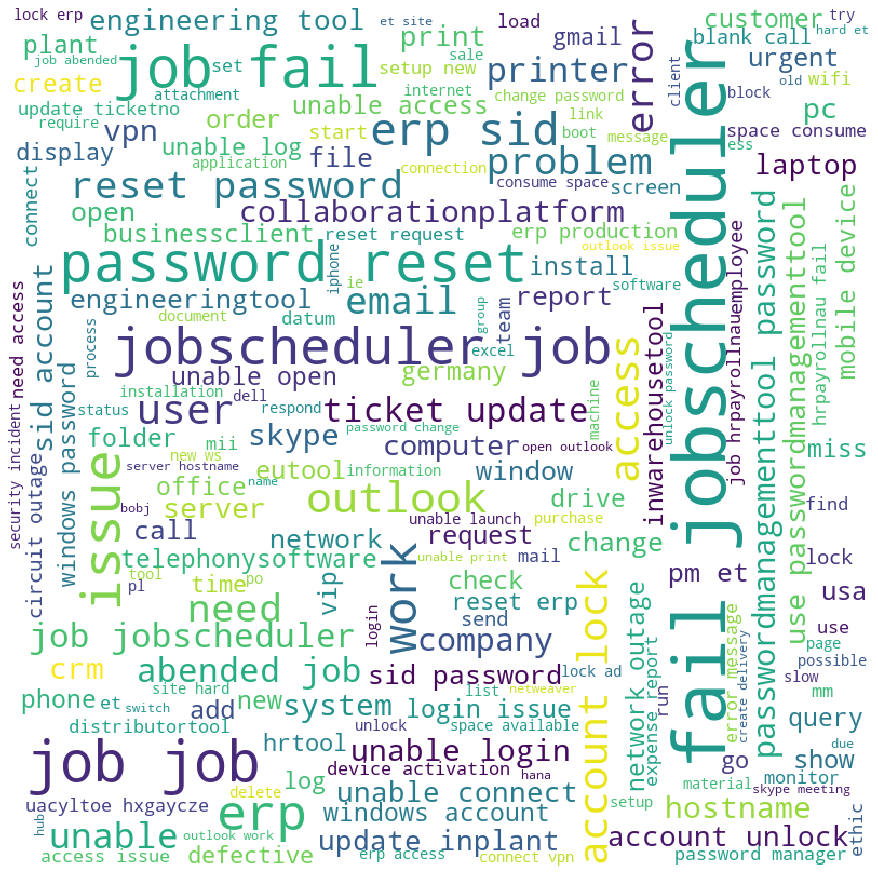

In [47]:
# Generate wordcloud for ticket Short description
generate_word_clod(' '.join(ticket['Short description'].str.strip()))

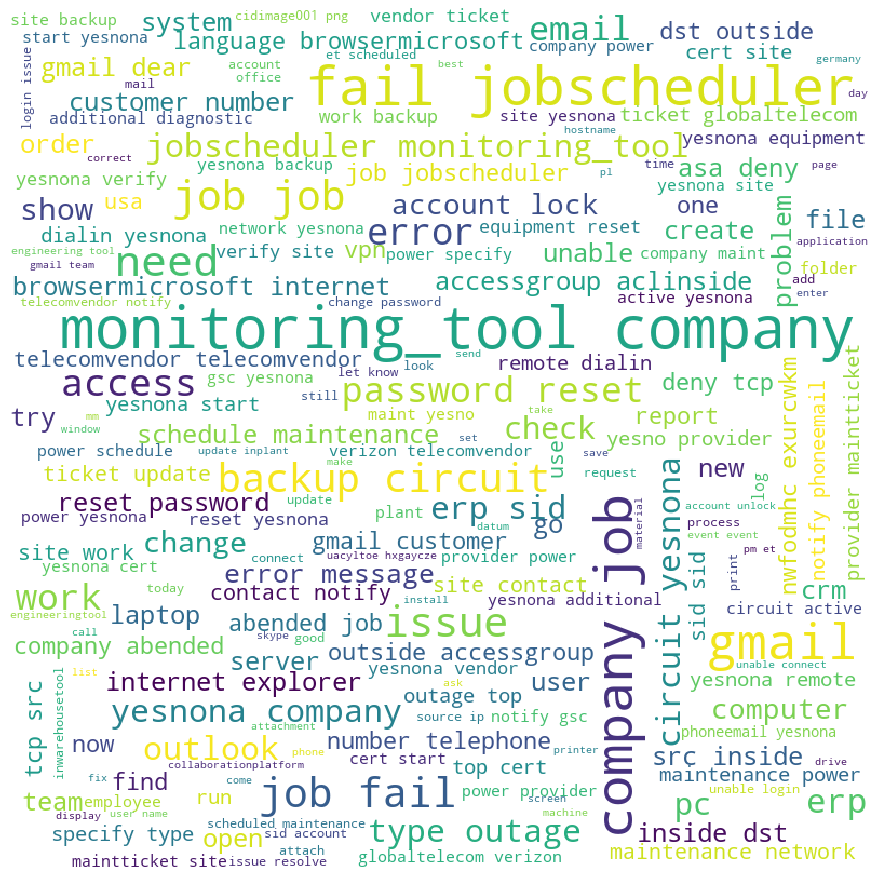

In [48]:
# Generate wordcloud for ticket Description
generate_word_clod(' '.join(ticket.Description.str.strip()))

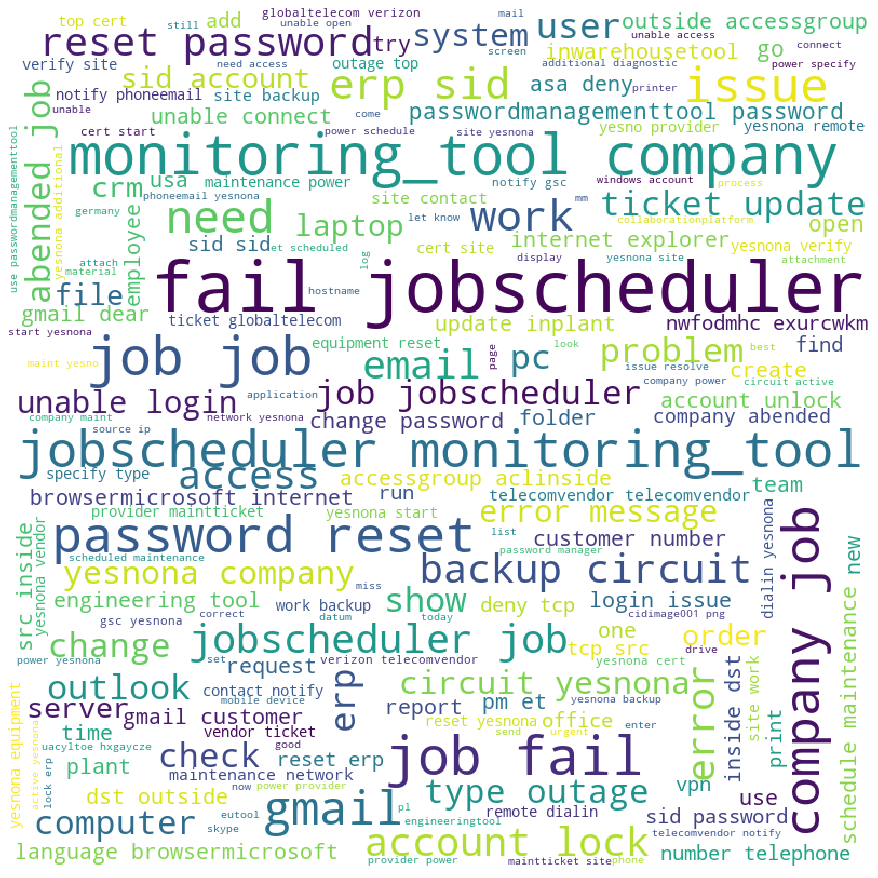

In [49]:
# Generate wordcloud for ticket Summary
generate_word_clod(' '.join(ticket.Summary.str.strip()))

In [50]:
# Serialize the dataset after EDA
with open('model_ready.pkl','wb') as f:
    pickle.dump(ticket, f, pickle.HIGHEST_PROTOCOL)

**Comments:**
- It's indicative from the n-gram analysis and the word cloud is that the entire dataset speaks more about issues around
    - **password reset (1246 times)**
    - **fail job_scheduler (1614 times)**
    - **outlook (948 times)**
    - **login (861 times)**
    - **job fail (897 times)**
- Analysis on GRP_0 which is the most frequent group to assign a ticket to reveals that this group deals with mostly the maintenance problems such as *password reset*, *account lock*, *login issue*, *ticket update* etc.
- Maximum of the tickets from GRP_0 can be reduced by self correcting itself by putting automation scripts/mechanisms to help resolve these common maintenance issues. This will help in lowering the inflow of service tickets thereby saving the person/hour efforts spend and increasing the business revenue.

## <u>Model Building</u>
Let's proceed towards trying different model architectures mentioned below to classify the problem and validate which one is outperforming.
- Multinomial Naive Bayes
- K Nearest neighbor
- Support Vector Machine
- Decission Tree
- Random Forest
- Deep Neural Network
- Convolutional Neural Network
- Recurrent Neural Network
- Recurrent Convolutional Neural Network
- RNN with LSTM

Let's create another column of categorical datatype from Assignment groups. Let's write some generic methods for utilities and to plot evaluation metrics.

In [13]:
# Create a target categorical column
ticket['target'] = ticket['Assignment group'].astype('category').cat.codes
ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 11 columns):
Short description    8500 non-null object
sd_len               8500 non-null int64
sd_word_count        8500 non-null int64
Description          8500 non-null object
desc_len             8500 non-null int64
desc_word_count      8500 non-null int64
Language             8500 non-null object
Caller               8500 non-null object
Summary              8500 non-null object
Assignment group     8500 non-null object
target               8500 non-null int8
dtypes: int64(4), int8(1), object(6)
memory usage: 672.5+ KB


In [0]:
# A class that logs the time
class Timer():
    '''
    A generic class to log the time
    '''
    def __init__(self):
        self.start_ts = None
    def start(self):
        self.start_ts = time()
    def stop(self):
        return 'Time taken: %2fs' % (time()-self.start_ts)
    
timer = Timer()

# A method that plots the Precision-Recall curve
def plot_prec_recall_vs_thresh(precisions, recalls, thresholds):
    plt.figure(figsize=(10,5))
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend()

# A method to train and test the model
def run_classification(estimator, X_train, X_test, y_train, y_test, arch_name=None, pipelineRequired=True, isDeepModel=False):
    timer.start()
    # train the model
    clf = estimator

    if pipelineRequired :
        clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', estimator),
                     ])
      
    if isDeepModel :
        clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=128,verbose=1,callbacks=call_backs(arch_name))
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_train_pred = clf.predict(X_train)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    else :
        clf.fit(X_train, y_train)
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('='*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    print(timer.stop(), 'to run the model')

In [15]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(ticket.Summary, 
                                                    ticket.target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

Shape of the training set: (6800,) (1700,)
Shape of the test set: (6800,) (1700,)


### <u>Naive Bayes Classifier</u>
Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. 

Advantages:
*   It works very well with text data
*   Easy to implement
*   Fast in comparing to other algorithms

Disadvantages:
*   A strong assumption about the shape of the data distribution
*   Limited by data scarcity for which any possible value in feature space, a likelihood value must be estimated by a frequentist





In [16]:
run_classification(MultinomialNB(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)
Training accuracy: 56.26%
Testing accur

### <u>K-nearest Neighbor</u>
In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.
k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification.

Both for classification and regression, a useful technique can be to assign weights to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones. For example, a common weighting scheme consists in giving each neighbor a weight of 1/d, where d is the distance to the neighbor.

The neighbors are taken from a set of objects for which the class (for k-NN classification) or the object property value (for k-NN regression) is known. This can be thought of as the training set for the algorithm, though no explicit training step is required.

A peculiarity of the k-NN algorithm is that it is sensitive to the local structure of the data.

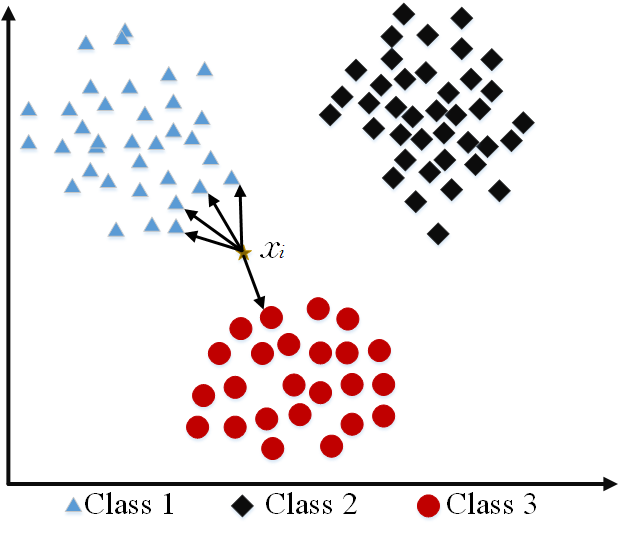

In [17]:
run_classification(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=

### <u>Support Vector Machine (SVM)</u>
In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

When data are unlabelled, supervised learning is not possible, and an unsupervised learning approach is required, which attempts to find natural clustering of the data to groups, and then map new data to these formed groups. The support-vector clustering algorithm, created by Hava Siegelmann and Vladimir Vapnik, applies the statistics of support vectors, developed in the support vector machines algorithm, to categorize unlabeled data, and is one of the most widely used clustering algorithms in industrial applications.

The advantages of support vector machines are based on scikit-learn page:

*   Effective in high dimensional spaces.
*   Still effective in cases where number of dimensions is greater than the number of samples
*   Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
*   Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:


*   If the number of features is much greater than the number of samples, avoiding over-fitting via choosing kernel functions and regularization term is crucial.
*   SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

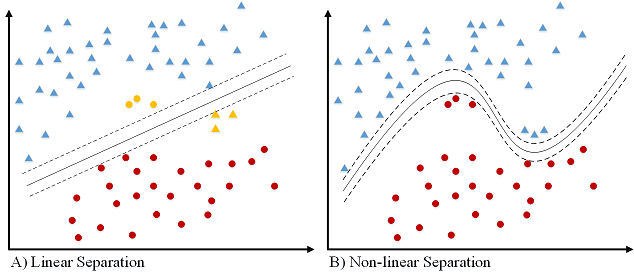

In [18]:
# SVM with Linear kernel
run_classification(LinearSVC(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
          

In [19]:
# SVM with RBF kernel
run_classification(SVC(kernel='rbf'), X_train, X_test, y_train, y_test)

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr'

### <u>Decision Tree</u>
Decision tree classifiers are utilized as a well known classification technique in different pattern recognition issues, for example, image classification and character recognition (Safavian & Landgrebe, 1991). Decision tree classifiers perform more successfully, specifically for complex classification problems, due to their high adaptability and computationally effective features. Besides, decision tree classifiers exceed expectations over numerous typical supervised classification methods (Friedl & Brodley, 1997).

In particular, no distribution assumption is needed by decision tree classifiers regarding the input data. This particular feature gives to the Decision Tree Classifiers a higher adaptability to deal with different datasets, whether numeric or categorical, even with missing data. Also, decision tree classifiers are basically nonparametric. Also, decision trees are ideal for dealing with nonlinear relations among features and classes. At long last, the classification procedure through a tree-like structure is constantly natural and interpretable.

In [20]:
run_classification(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
   

### <u>Random Forest</u>
Random forests or random decision forests technique is an ensemble learning method for text classification. This method was introduced by T. Kam Ho in 1995 for first time which used t trees in parallel. This technique was later developed by L. Breiman in 1999 that they found converged for RF as a margin measure.

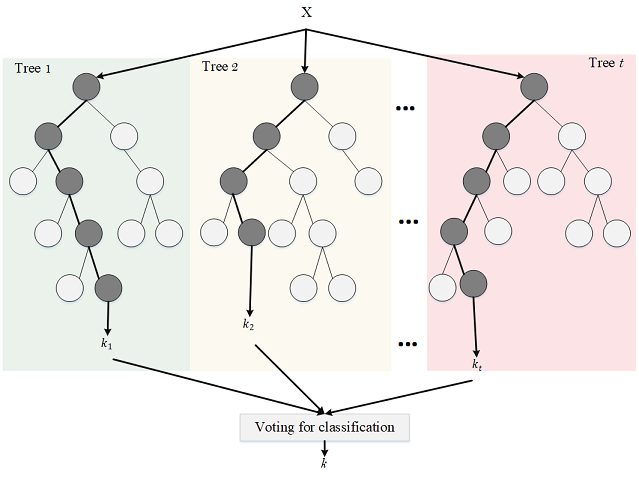

In [21]:
run_classification(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                     

**Observations:**
- All of the following Statistical Machine learning algorithms we tried, are heavily overfitted. The training accuracy for all of them is coming to be more than 90%
- And the test accuracies are as follows:
    - Multinomial Naive Bayes- 52.47%
    - K Nearest Neighbor- 61.24%
    - Linear SVM- 67.41%
    - SVC with RBF kernel- 62.12%
    - Decission Tree- 56.47%
    - Random Forest- 61.35%
- We'll be fine tuning the models and reduce the overfitting in next iteration.

## Neural Network
A Neural Network, unlike statistical ML algorithms, is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria.

Define a function for checkpoints

In [0]:
#Path where you want to save the weights, model and checkpoints
model_path = "Weights/"
%mkdir Weights

# Define model callbacks
def call_backs(name):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=100)
    model_checkpoint =  ModelCheckpoint(model_path + name + '_epoch{epoch:02d}_loss{val_loss:.4f}.h5',
                                                               monitor='val_loss',
                                                               verbose=1,
                                                               save_best_only=True,
                                                               save_weights_only=False,
                                                               mode='min',
                                                               period=1)
    return [model_checkpoint, early_stopping]

### <u>Deep Neural Networks</u>
Deep Neural Networks architectures are designed to learn through multiple connection of layers where each single layer only receives connection from previous and provides connections only to the next layer in hidden part. The input is a connection of feature space (As discussed in Section Feature_extraction with first hidden layer. For Deep Neural Networks (DNN), input layer could be tf-ifd, word embedding, or etc. as shown in standard DNN in Figure. The output layer houses neurons equal to the number of classes for multi-class classification and only one neuron for binary classification. But our main contribution in this paper is that we have many trained DNNs to serve different purposes. Here, we have multi-class DNNs where each learning model is generated randomly (number of nodes in each layer as well as the number of layers are randomly assigned). Our implementation of Deep Neural Network (DNN) is basically a discriminatively trained model that uses standard back-propagation algorithm and sigmoid or ReLU as activation functions. The output layer for multi-class classification should use Softmax.

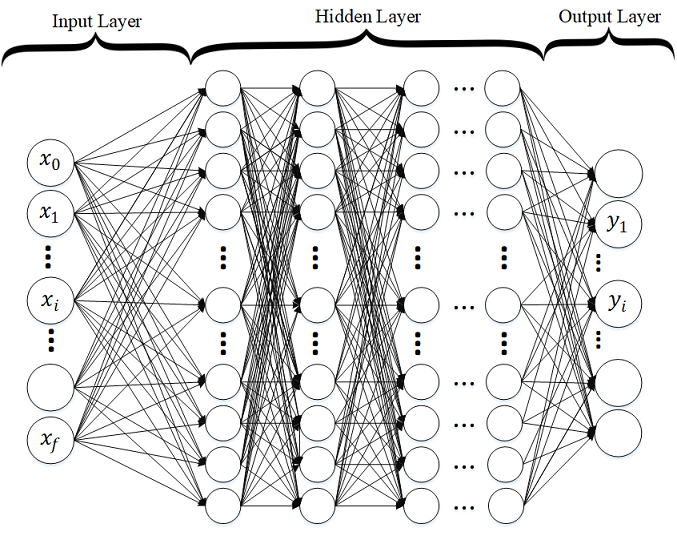

In [0]:
# Function to build Deep NN
def Build_Model_DNN_Text(shape, nClasses, dropout=0.3):
    """
    buildModel_DNN_Tex(shape, nClasses,dropout)
    Build Deep neural networks Model for text classification
    Shape is input feature space
    nClasses is number of classes
    """
    model = Sequential()
    node = 512 # number of nodes
    nLayers = 4 # number of  hidden layer
    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    model.add(Dense(nClasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    print(model.summary())
    return model

In [24]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(ticket.Summary)
X_train_tfidf = Tfidf_vect.transform(X_train)
X_test_tfidf = Tfidf_vect.transform(X_test)

# Instantiate the network
model_DNN = Build_Model_DNN_Text(X_train_tfidf.shape[1], 75)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               2560512   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    

In [25]:
model_DNN.fit(X_train_tfidf, y_train,
                              validation_data=(X_test_tfidf, y_test),
                              callbacks=call_backs("NN"),
                              epochs=10,
                              batch_size=128,
                              verbose=2)
predicted = model_DNN.predict(X_test_tfidf)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 6800 samples, validate on 1700 samples
Epoch 1/10





 - 10s - loss: 2.9371 - acc: 0.4151 - val_loss: 2.0986 - val_acc: 0.5506

Epoch 00001: val_loss improved from inf to 2.09862, saving model to Weights/NN_epoch01_loss2.0986.h5
Epoch 2/10
 - 1s - loss: 1.8714 - acc: 0.5768 - val_loss: 1.7426 - val_acc: 0.5935

Epoch 00002: val_loss improved from 2.09862 to 1.74256, saving model to Weights/NN_epoch02_loss1.7426.h5
Epoch 3/10
 - 1s - loss: 1.5311 - acc: 0.6276 - val_loss: 1.6726 - val_acc: 0.6082

Epoch 00003: val_loss improved from 1.74256 to 1.67264, saving model to Weights/NN_epoch03_loss1.6726.h5
Epoch 4/10
 - 1s - loss: 1.2625 - acc: 0.6744 - val_loss: 1.8418 - val_acc: 0.6253

Epoch 00004: val_loss did not improve from 1.67264
Epoch 5/10
 - 1s - loss: 1.0332 - acc: 0.7281 - val_loss: 1.6876 - val_acc: 0.6324

Epoch 00005: val_loss did not improve from 1.67264
Epoch 6/10
 - 1s

### <u>Extract Glove Embeddings</u>
- Extract Glove 6Billion word embeddings. We're going to use the 100d and 200d file which has 100 and 200 embedding dimensions for each word in the corpus respectively.

In [26]:
# Check if it is already extracted else Open the zipped file as readonly
if not os.path.isfile('glove.6B/glove.6B.100d.txt'):
    glove_embeddings = 'glove.6B.zip'
    with ZipFile(glove_embeddings, 'r') as archive:
        archive.extractall('glove.6B')

# List the files under extracted folder
os.listdir('glove.6B')

['glove.6B.200d.txt', 'glove.6B.100d.txt', 'glove.6B.50d.txt']

### <u>Convolutional Neural Networks (CNN)</u>
Another deep learning architecture that is employed for hierarchical document classification is Convolutional Neural Networks (CNN) . Although originally built for image processing with architecture similar to the visual cortex, CNNs have also been effectively used for text classification. In a basic CNN for image processing, an image tensor is convolved with a set of kernels of size d by d. These convolution layers are called feature maps and can be stacked to provide multiple filters on the input. To reduce the computational complexity, CNNs use pooling which reduces the size of the output from one layer to the next in the network. Different pooling techniques are used to reduce outputs while preserving important features.


The most common pooling method is max pooling where the maximum element is selected from the pooling window. In order to feed the pooled output from stacked featured maps to the next layer, the maps are flattened into one column. The final layers in a CNN are typically fully connected dense layers. In general, during the back-propagation step of a convolutional neural network not only the weights are adjusted but also the feature detector filters. A potential problem of CNN used for text is the number of ‘channels’, Sigma (size of the feature space). This might be very large (e.g. 50K), for text but for images this is less of a problem (e.g. only 3 channels of RGB). This means the dimensionality of the CNN for text is very high.

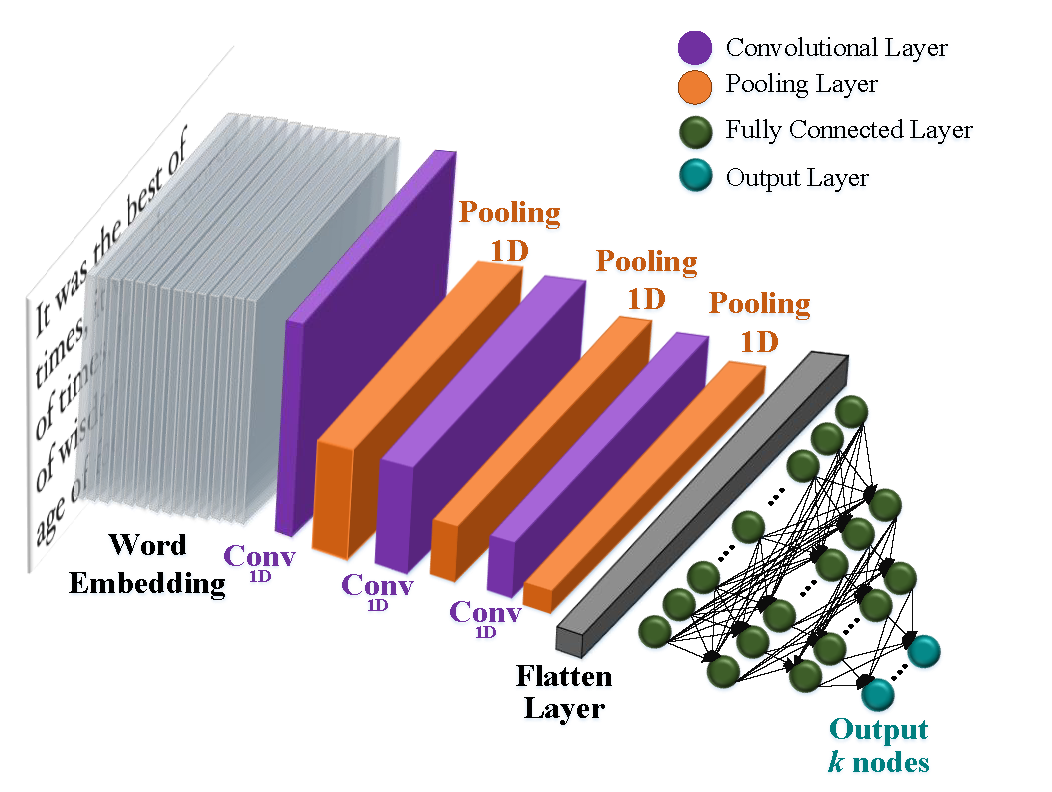

In [0]:
gloveFileName = 'glove.6B/glove.6B.200d.txt'
MAX_SEQUENCE_LENGTH = 500
EMBEDDING_DIM=200
MAX_NB_WORDS=75000

# Function to generate Embedding
def loadData_Tokenizer(X_train, X_test,filename):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    # np.random.shuffle(indices)
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    f = open(filename, encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_index[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index)


embedding_matrix = []

def buildEmbed_matrices(word_index,embedding_dim):
    embedding_matrix = np.random.random((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) !=len(embedding_vector):
                print("could not broadcast input array from shape",str(len(embedding_matrix[i])), "into shape",str(len(embedding_vector)),
                      " Please make sure your"" EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [28]:
# Generate Glove embedded datasets
X_train_Glove, X_test_Glove, word_index, embeddings_index = loadData_Tokenizer(X_train,X_test,gloveFileName)
embedding_matrix = buildEmbed_matrices(word_index,EMBEDDING_DIM)

Found 15207 unique tokens.
(8500, 500)
Total 400000 word vectors.


In [0]:
def Build_Model_CNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    """
        def buildModel_CNN(word_index, embeddings_index, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=50, dropout=0.5):
        word_index in word index ,
        embeddings_index is embeddings index, look at data_helper.py
        nClasses is number of classes,
        MAX_SEQUENCE_LENGTH is maximum lenght of text sequences,
        EMBEDDING_DIM is an int value for dimention of word embedding look at data_helper.py
    """
    model = Sequential()
    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True)
    # applying a more complex convolutional approach
    convs = []
    filter_sizes = []
    layer = 5
    print("Filter  ",layer)
    for fl in range(0,layer):
        filter_sizes.append((fl+2))
    node = 128
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    for fsz in filter_sizes:
        l_conv = Conv1D(node, kernel_size=fsz, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(5)(l_conv)
        #l_pool = Dropout(0.25)(l_pool)
        convs.append(l_pool)
    l_merge = Concatenate(axis=1)(convs)
    l_cov1 = Conv1D(node, 5, activation='relu')(l_merge)
    l_cov1 = Dropout(dropout)(l_cov1)
    l_batch1 = BatchNormalization()(l_cov1)
    l_pool1 = MaxPooling1D(5)(l_batch1)
    l_cov2 = Conv1D(node, 5, activation='relu')(l_pool1)
    l_cov2 = Dropout(dropout)(l_cov2)
    l_batch2 = BatchNormalization()(l_cov2)
    l_pool2 = MaxPooling1D(30)(l_batch2)
    l_flat = Flatten()(l_pool2)
    l_dense = Dense(1024, activation='relu')(l_flat)
    l_dense = Dropout(dropout)(l_dense)
    l_dense = Dense(512, activation='relu')(l_dense)
    l_dense = Dropout(dropout)(l_dense)
    preds = Dense(nclasses, activation='softmax')(l_dense)
    model = Model(sequence_input, preds)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [30]:
# Train the network and run classification
model_CNN = Build_Model_CNN_Text(word_index,embedding_matrix, 75)
run_classification(model_CNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='CNN')

Filter   5

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 500)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 500, 200)     3041600     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 499, 128)     51328       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 498, 128)     76928       embedding_1[0][0]                
________________________________________________________________________________

### <u>Recurrent Neural Networks (RNN)</u>
RNN assigns more weights to the previous data points of sequence. Therefore, this technique is a powerful method for text, string and sequential data classification. Moreover, this technique could be used for image classification as we did in this work. In RNN, the neural net considers the information of previous nodes in a very sophisticated method which allows for better semantic analysis of the structures in the dataset.

**Gated Recurrent Unit (GRU)**

Gated Recurrent Unit (GRU) is a gating mechanism for RNN which was introduced by J. Chung et al. and K.Cho et al.. GRU is a simplified variant of the LSTM architecture, but there are differences as follows: GRU contains two gates and does not possess any internal memory (as shown in Figure; and finally, a second non-linearity is not applied (tanh in Figure).

In [0]:
def Build_Model_RNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    """
    def buildModel_RNN(word_index, embeddings_matrix, nclasses,  MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=100, dropout=0.5):
    word_index in word index ,
    embeddings_matrix is embeddings_matrix, look at data_helper.py
    nClasses is number of classes,
    MAX_SEQUENCE_LENGTH is maximum lenght of text sequences
    """
    model = Sequential()
    hidden_layer = 3
    gru_node = 32
    
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    print(gru_node)
    for i in range(0,hidden_layer):
        model.add(GRU(gru_node,return_sequences=True, recurrent_dropout=0.2))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    model.add(GRU(gru_node, recurrent_dropout=0.2))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(nclasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='sgd',
                      metrics=['accuracy'])
    
    print(model.summary())
    return model

In [32]:
# Train the network and run classification
model_RNN = Build_Model_RNN_Text(word_index,embedding_matrix, 75)
run_classification(model_RNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='RNN')

32
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 200)          3041600   
_________________________________________________________________
gru_1 (GRU)                  (None, 500, 32)           22368     
_________________________________________________________________
dropout_10 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 500, 32)           128       
_________________________________________________________________
gru_2 (GRU)                  (None, 500, 32)           6240      
_________________________________________________________________
dropout_11 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 500, 32)       

### <u>Recurring Convolution Neural Network(RCNN)</u>
Recurrent Convolutional Neural Networks (RCNN) is also used for text classification. The main idea of this technique is capturing contextual information with the recurrent structure and constructing the representation of text using a convolutional neural network. This architecture is a combination of RNN and CNN to use advantages of both technique in a model.

In [0]:
def Build_Model_RCNN_Text(word_index, embeddings_matrix, nclasses):
    kernel_size = 2
    filters = 256
    pool_size = 2
    gru_node = 256
    
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(LSTM(gru_node, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(nclasses))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [34]:
# Train the network and run classification
model_RCNN = Build_Model_CNN_Text(word_index,embedding_matrix, 75)
run_classification(model_RCNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='RCNN')

Filter   5
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 500)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 500, 200)     3041600     input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 499, 128)     51328       embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 498, 128)     76928       embedding_3[0][0]                
_________________________________________________________________________________

### <u>RNN with LSTM networks</u>
Long Short-Term Memory~(LSTM) was introduced by S. Hochreiter and J. Schmidhuber and developed by many research scientists.

To deal with these problems Long Short-Term Memory (LSTM) is a special type of RNN that preserves long term dependency in a more effective way compared to the basic RNNs. This is particularly useful to overcome vanishing gradient problem as LSTM uses multiple gates to carefully regulate the amount of information that will be allowed into each node state. The figure shows the basic cell of a LSTM model.

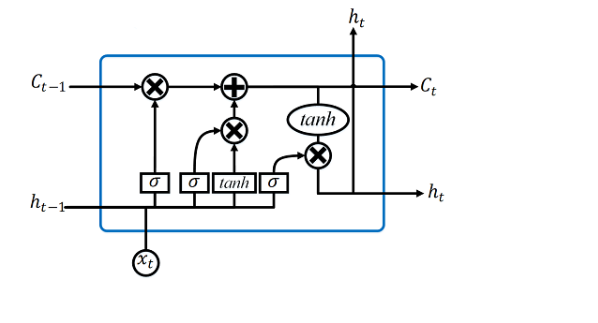

In [0]:
EMBEDDING_DIM = 100
gloveFileName = 'glove.6B/glove.6B.100d.txt'

from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed, Activation
from keras.layers import Flatten, Permute, merge, Input
from keras.layers import Embedding
from keras.models import Model
from keras.layers import Input, Dense, multiply, concatenate, Dropout
from keras.layers import GRU, Bidirectional


def Build_Model_LTSM_Text(word_index, embeddings_matrix, nclasses):
    kernel_size = 2
    filters = 256
    pool_size = 2
    gru_node = 256
    
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, recurrent_dropout=0.2)))
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(nclasses))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [38]:
X_train_Glove,X_test_Glove, word_index,embeddings_index = loadData_Tokenizer(X_train,X_test,gloveFileName)
embedding_matrix = buildEmbed_matrices(word_index,EMBEDDING_DIM)

model_LTSM = Build_Model_LTSM_Text(word_index,embedding_matrix, 75)
run_classification(model_LTSM, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='LSTM')

Found 15207 unique tokens.
(8500, 500)
Total 400000 word vectors.
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 100)          1520800   
_________________________________________________________________
dropout_18 (Dropout)         (None, 500, 100)          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 499, 256)          51456     
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 249, 256)          0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 248, 256)          131328    
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 124, 256)          0         
______________________________________________________

## Summary
Out of all the model architectures we've tried, the accuracy of each of the model is as follows in the table. Statistical models are overfitted to a higher degree. One obvious reason is the dataset is highly imbalanced. And Neural networks need to be fine tuned to increase accuracy. Following are some of the techniques we'll be trying in Milestone-2 as part of fine tuning.
- Dealing with imbalanced dataset. 
    - Creating distinctive clusters under GRP_0 and downsampling top clusters
    - Clubbing together all those groups into one which has 30 or less tickets assigned
- Replacing TF-IDF vectorizer technique with word embeddings for statistical ML algorithms.
- Running GridSearchCV to perform hyper-parameter tuning.
- Altering intermediate layers in case of Newural networks
- Using Transfer learning

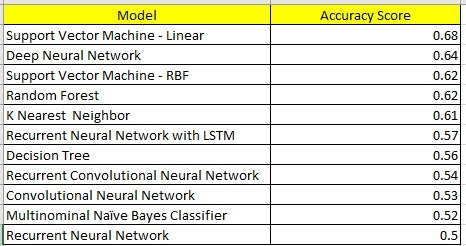